<a href="https://colab.research.google.com/github/rulehial/Analisis-Educacion/blob/main/AnalisisEduacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df_colegios = pd.read_csv("https://raw.githubusercontent.com/rulehial/Analisis-Educacion/main/Datos/20220914_Directorio_Oficial_EE_2022_20220430_WEB.csv", sep=";")
df_colegios.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_09,ENS_10,ENS_11,MAT_TOTAL,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL
0,2022,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,0,0,0,667,1,1,2,,GRATUITO,GRATUITO
1,2022,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,0,0,0,166,1,1,2,,GRATUITO,GRATUITO
2,2022,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,62000660,1,15,AYP,151,...,0,0,0,376,1,1,1,,GRATUITO,GRATUITO
3,2022,4,3,LICEO OCTAVIO PALMA PEREZ,,62000660,1,15,AYP,151,...,0,0,0,1014,1,1,1,,GRATUITO,GRATUITO
4,2022,5,1,JOVINA NARANJO FERNANDEZ,,62000660,1,15,AYP,151,...,0,0,0,771,1,1,7,PLURALISTA,GRATUITO,GRATUITO


In [3]:
df_colegios.columns.values

array(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'MRUN', 'RUT_SOSTENEDOR',
       'P_JURIDICA', 'COD_REG_RBD', 'NOM_REG_RBD_A', 'COD_PRO_RBD',
       'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD', 'NOM_DEPROV_RBD',
       'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'LATITUD', 'LONGITUD',
       'CONVENIO_PIE', 'PACE', 'ENS_01', 'ENS_02', 'ENS_03', 'ENS_04',
       'ENS_05', 'ENS_06', 'ENS_07', 'ENS_08', 'ENS_09', 'ENS_10',
       'ENS_11', 'MAT_TOTAL', 'MATRICULA', 'ESTADO_ESTAB',
       'ORI_RELIGIOSA', 'ORI_OTRO_GLOSA', 'PAGO_MATRICULA',
       'PAGO_MENSUAL'], dtype=object)

In [4]:
df_colegios.shape[0]

16601

#Revisar Duplicados

###Filas Duplicadas

In [5]:
df_colegios[df_colegios.duplicated()]


,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ENS_09,ENS_10,ENS_11,MAT_TOTAL,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL


###Columnas Duplicadas

In [6]:
duplicates = []
for col in range(df_colegios.shape[1]):
    # Separo las columnas y las guardo en la variable contents, queda como tipo pandas.series
    columnas = df_colegios.iloc[:, col]
    # print(type(columnas))
    for comp in range(col + 1, df_colegios.shape[1]):
      # print(comp)
      if columnas.equals(df_colegios.iloc[:, comp]):
          duplicates.append(comp)
duplicates = np.unique(duplicates).tolist()
print(duplicates)

[]


In [7]:
colegio_por_region = df_colegios.groupby('NOM_REG_RBD_A').size().reset_index(name='CANTIDAD')
colegio_por_region

,NOM_REG_RBD_A,CANTIDAD
0,ANTOF,310
1,ARAUC,1634
2,ATCMA,231
3,AYP,193
4,AYSEN,111
5,BBIO,1552
6,COQ,1023
7,LAGOS,1479
8,LGBO,964
9,MAG,125


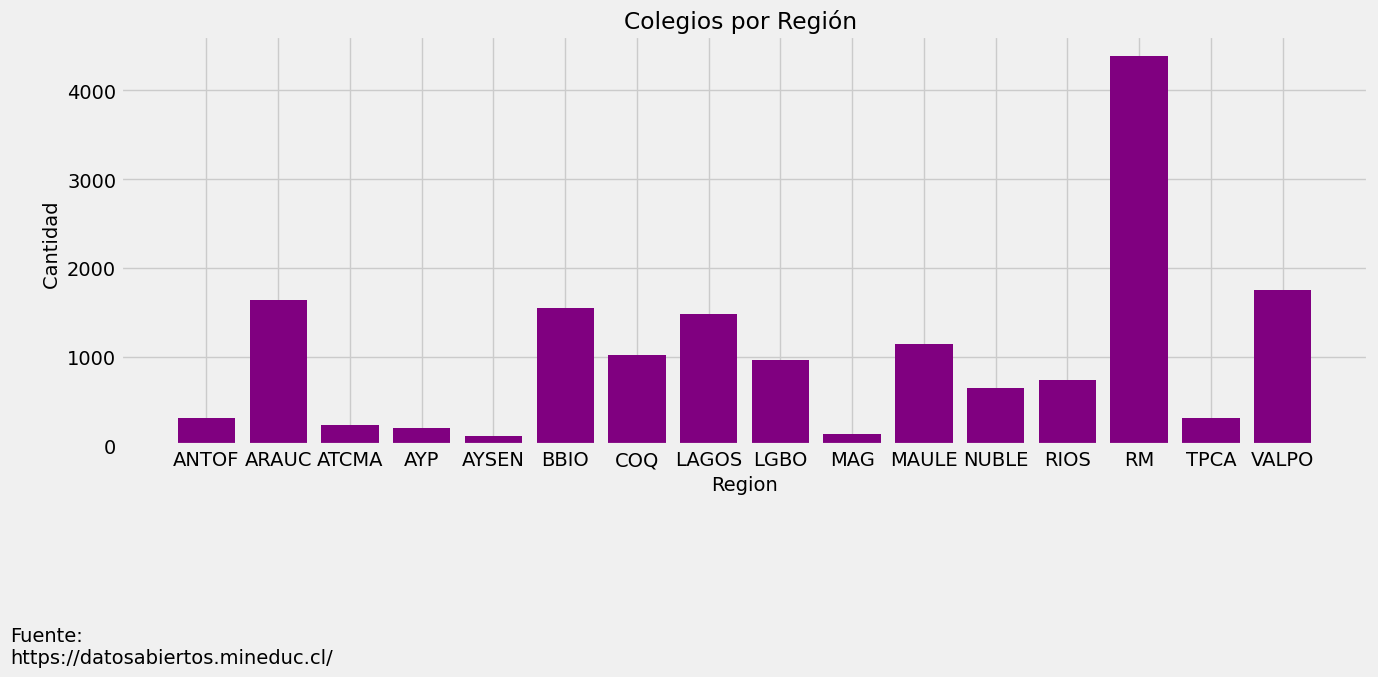

In [8]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

#ax = colegio_por_region['CANTIDAD'].plot(ax=ax, kind="bar", color='purple')
ax.bar(colegio_por_region['NOM_REG_RBD_A'], colegio_por_region['CANTIDAD'], color='purple')

ax.set_yscale(scale)

ax.set_title(f'Colegios por Región ', fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Cantidad ', fontsize='medium')

plt.annotate('Fuente:\nhttps://datosabiertos.mineduc.cl/', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')

#plt.savefig('-COVID-19-Chile-Confirmados-Region.png', bbox_inches='tight', format='png', dvi=700)

plt.savefig('Colegios-Region.png', bbox_inches='tight', format='png', dpi=700)

#Funcion Etiquetas Graficos

In [67]:
#  Función que define etiquetas en los gráficos. Aquí **no es necesario modificarla**
#
#  qué significan los parámetros:
#  data: el dataFrame a utilizar e.g. data['nuevosConfirmados'].iloc[:-1]
#  scale: la que se defina en el entorno de la figura
#  fontsize: tamaño de la fuente de la etiqueta
#  ypos: posición de la etiqueta con respecto al valor graficado
#  color: el color de la etiqueta (estamos utilizando transparencia con alpha=0.5)

def my_tags(data,scale,fontsize,ypos,color):
  # indices = np.arange(len(data))
  # print(indices)
  for i, val in enumerate(data):
    if val > 0:
      if scale == 'log': y_position = val*ypos
      elif scale == 'linear': y_position = val + ypos + 50
      print(i-len(str(i))*0.11)
      print((i + 0.5) / 2)
      ax.text((i + 0.5) / 2, y_position, str(int(val)), fontsize=fontsize,
            bbox=dict(boxstyle="square",
                    alpha=0.5,
                    fc=color,))

In [ ]:
# def my_tags(patches,scale,fontsize,color):
#   # indices = np.arange(len(data))
#   # print(indices)
#   for bar in bar_container.patches:
#     plt.text(bar.get_x() + bar.get_width() / 2,
#              bar.get_height(),
#              f'{int(bar.get_height())}',
#              fontsize=fontsize,
#              ha='center',
#              va='bottom',
#              bbox=dict( boxstyle="square",
#                         alpha=0.5,
#                         fc='white'
#                         )
#              )

In [162]:
def my_tags(patches,line_data,scale,fontsize,color):
  # indices = np.arange(len(data))
  # print(indices)
  for i,bar in enumerate(patches):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{int(bar.get_height())}',
             fontsize=fontsize,
             ha='center',
             va='bottom',
             bbox=dict( boxstyle="square",
                        alpha=0.5,
                        fc='white'
                        )
             )
    # Agregar etiquetas a las líneas
    plt.text(bar.get_x() + bar.get_width() / 2,
              line_data[i],
              f'{int(line_data[i])}',
              fontsize=fontsize - 2,
              ha='center',
              va='bottom',
              bbox=dict(boxstyle="square", alpha=0.5, fc=color))

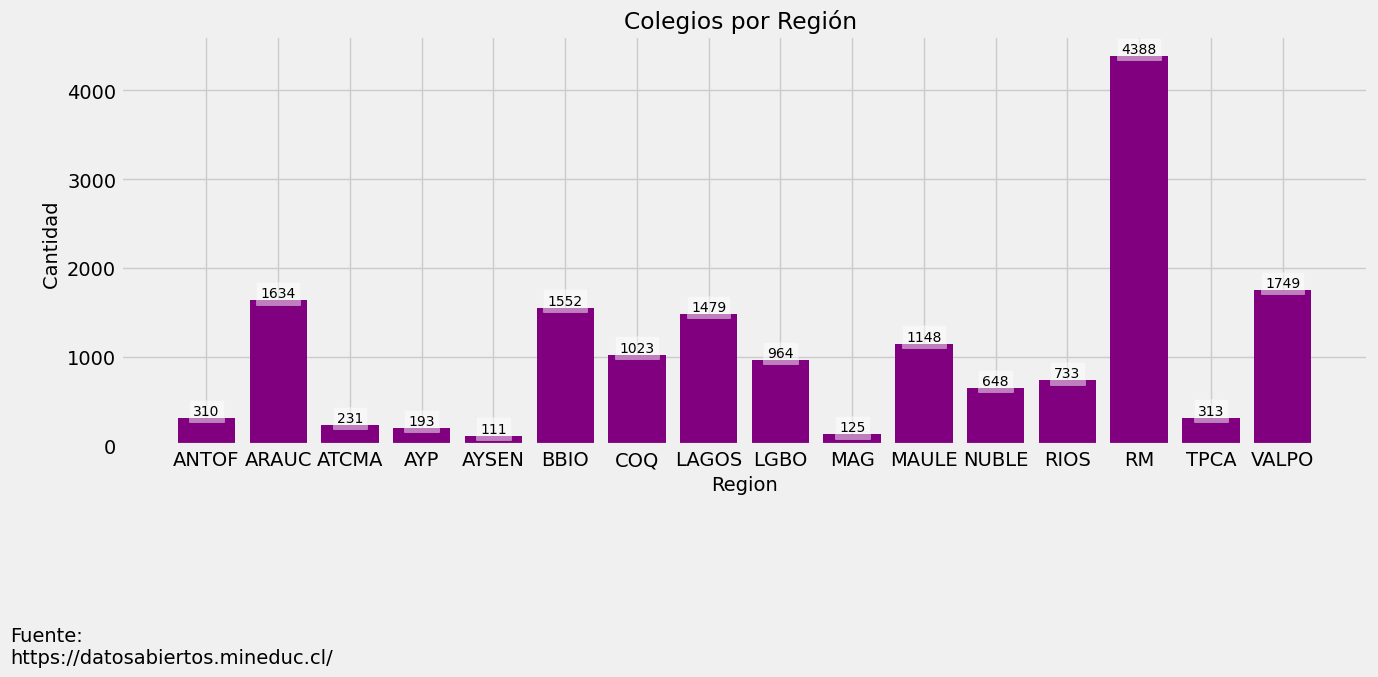

In [152]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

#ax = colegio_por_region['CANTIDAD'].plot(ax=ax, kind="bar", color='purple')
bar_container  = ax.bar(colegio_por_region['NOM_REG_RBD_A'], colegio_por_region['CANTIDAD'], color='purple')


fontsize = 10


# my_tags(colegio_por_region['CANTIDAD'],scale,fontsize,ypos,'white')
my_tags(bar_container.patches,scale,fontsize,'white')





ax.set_yscale(scale)

ax.set_title(f'Colegios por Región ', fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Cantidad ', fontsize='medium')

plt.annotate('Fuente:\nhttps://datosabiertos.mineduc.cl/', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')


plt.savefig('Colegios-Region.png', bbox_inches='tight', format='png', dpi=700)

#Tratamiento anexos codigos de enseñaza

In [88]:
df_cod_ense = pd.read_csv("https://raw.githubusercontent.com/rulehial/Analisis-Educacion/main/Datos/AnexoCodigoEnsenanzaNivel.csv", sep=",")
df_cod_ense #.head()

,COD_ENSE,Descripción,nivel
0,0,No Aplica,Otra
1,10,Educación Parvularia,Parvularia
2,110,Enseñanza Básica,Básica
3,160,Educación Básica Común Adultos (Decreto 584/2007),Básica
4,161,Educación Básica Especial Adultos,Básica
5,163,Escuelas Cárceles (Básica Adultos),Básica
6,165,Educación Básica Adultos Sin Oficios (Decreto ...,Básica
7,167,Educación Básica Adultos Con Oficios (Decreto ...,Básica
8,211,Educación Especial Discapacidad Auditiva,Especial
9,212,Educación Especial Discapacidad Intelectual,Especial


###Agregar cada cod_ensenanza al df_colegios (Descartada)

In [113]:
df_cod_ense_sufijo = df_cod_ense.add_suffix('_01')
merged_df  = pd.merge(df_colegios, df_cod_ense_sufijo ,how='inner',left_on='ENS_01', right_on='COD_ENSE_01')
# merged_df.loc[:,["ENS_01","COD_ENSE_01"]].head()
merged_df.head()

,AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,MAT_TOTAL,MATRICULA,ESTADO_ESTAB,ORI_RELIGIOSA,ORI_OTRO_GLOSA,PAGO_MATRICULA,PAGO_MENSUAL,COD_ENSE_01,Descripción_01,nivel_01
0,2022,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,667,1,1,2,,GRATUITO,GRATUITO,463,Educación Media T-P Comercial Adultos (Decreto...,Media
1,2022,40429,2,LICEO TECNICO PROFESIONAL DE ADULTOS,,70938800,1,1,TPCA,11,...,603,1,1,2,,GRATUITO,GRATUITO,463,Educación Media T-P Comercial Adultos (Decreto...,Media
2,2022,41375,5,"CENTRO DE EDUCACIÓN DE ADULTOS (C.E.I.A.),`INS...",,65058088,1,11,AYSEN,111,...,43,1,1,1,,SIN INFORMACION,SIN INFORMACION,463,Educación Media T-P Comercial Adultos (Decreto...,Media
3,2022,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,166,1,1,2,,GRATUITO,GRATUITO,10,Educación Parvularia,Parvularia
4,2022,8,6,COLEGIO INTEGRADO EDUARDO FREI MONTALVA,,62000660,1,15,AYP,151,...,701,1,1,7,LAICO,GRATUITO,GRATUITO,10,Educación Parvularia,Parvularia


###Crear nueva tabla con los cod_enseñanza como listado en columna unica

In [148]:
df_cod_ense_colegios = pd.DataFrame({'COD_ENSE': pd.concat([df_colegios['ENS_01'],
                                                             df_colegios['ENS_02'],
                                                             df_colegios['ENS_03'],
                                                             df_colegios['ENS_04'],
                                                             df_colegios['ENS_05'],
                                                             df_colegios['ENS_06'],
                                                             df_colegios['ENS_07'],
                                                             df_colegios['ENS_08'],
                                                             df_colegios['ENS_09'],
                                                             df_colegios['ENS_10'],
                                                             df_colegios['ENS_11']
                                                             ], ignore_index=True),
                                     'RBD': pd.concat([df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD'],
                                                             df_colegios['RBD']
                                                             ], ignore_index=True),
                                     'ORIGEN': pd.concat([pd.Series(['1'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['2'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['3'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['4'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['5'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['6'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['7'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['8'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['9'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['10'] * len(df_colegios), name='ORIGEN'),
                                                          pd.Series(['11'] * len(df_colegios), name='ORIGEN')
                                                          ], ignore_index=True)

                                      })

df_cod_ense_colegios['ORIGEN'] = df_cod_ense_colegios['ORIGEN'].astype(int)

# df_cod_ense_colegios.info()
df_cod_ense_colegios.tail()
# print(df_cod_ense_colegios.groupby('RBD').size())


,COD_ENSE,RBD,ORIGEN
182606,0,42089,11
182607,0,42090,11
182608,0,42091,11
182609,0,42092,11
182610,0,42095,11


In [149]:
df_cod_ense_colegios = pd.merge(df_cod_ense_colegios, df_cod_ense, on="COD_ENSE").sort_values(by=['RBD','ORIGEN']).reset_index(drop=True)
df_cod_ense_colegios

,COD_ENSE,RBD,ORIGEN,Descripción,nivel
0,463,1,1,Educación Media T-P Comercial Adultos (Decreto...,Media
1,510,1,2,Enseñanza Media T-P Industrial Niños y Jóvenes,Media
2,563,1,3,Educación Media T-P Industrial Adultos (Decret...,Media
3,610,1,4,Enseñanza Media T-P Técnica Niños y Jóvenes,Media
4,663,1,5,Educación Media T-P Técnica Adultos (Decreto N...,Media
...,...,...,...,...,...
182558,0,42095,7,No Aplica,Otra
182559,0,42095,8,No Aplica,Otra
182560,0,42095,9,No Aplica,Otra
182561,0,42095,10,No Aplica,Otra


In [151]:
# cento la cantidad de colegios de media que existen y los agrupo por region
df_colegio_por_region_cod_ens = pd.merge(df_cod_ense_colegios, df_colegios, on ='RBD')

df_colegio_por_region_cod_ens = df_colegio_por_region_cod_ens[df_colegio_por_region_cod_ens['nivel'] == 'Media'].groupby('NOM_REG_RBD_A').size().reset_index(name='CANTIDAD')
df_colegio_por_region_cod_ens

,NOM_REG_RBD_A,CANTIDAD
0,ANTOF,131
1,ARAUC,368
2,ATCMA,94
3,AYP,67
4,AYSEN,52
5,BBIO,409
6,COQ,251
7,LAGOS,332
8,LGBO,293
9,MAG,51


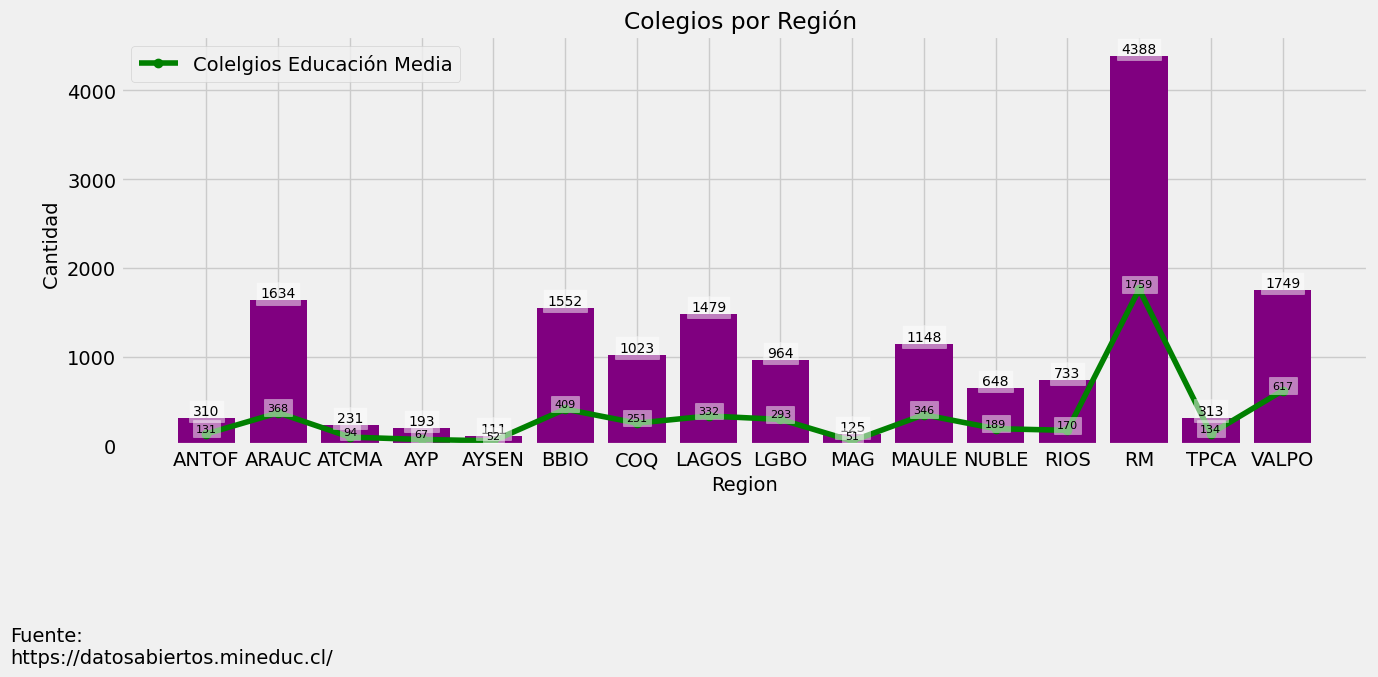

In [164]:
fig, ax = plt.subplots(tight_layout=True,figsize=(14,7))

scale = 'linear'

#ax = colegio_por_region['CANTIDAD'].plot(ax=ax, kind="bar", color='purple')
bar_container  = ax.bar(colegio_por_region['NOM_REG_RBD_A'], colegio_por_region['CANTIDAD'], color='purple')


fontsize = 10


# my_tags(colegio_por_region['CANTIDAD'],scale,fontsize,ypos,'white')
# my_tags(bar_container.patches,scale,fontsize,'white')

line_data = df_colegio_por_region_cod_ens['CANTIDAD']


ax.plot(colegio_por_region['NOM_REG_RBD_A'], line_data, color='green', marker='o', linestyle='-', label='Línea')

my_tags(bar_container.patches, line_data, scale, fontsize, 'white')


ax.set_yscale(scale)
plt.legend(fontsize='medium', labels=['Colelgios Educación Media'], loc = 'upper left')

ax.set_title(f'Colegios por Región ', fontsize='large')
ax.set_xlabel(f'Region', fontsize='medium')
ax.set_ylabel(f'Cantidad ', fontsize='medium')

plt.annotate('Fuente:\nhttps://datosabiertos.mineduc.cl/', (0,0), (-80,-130), fontsize='medium', xycoords='axes fraction', textcoords='offset points', va='top')


plt.savefig('Colegios-Region.png', bbox_inches='tight', format='png', dpi=700)